In [14]:
#!wget https://github.com/SVizor42/ML_Zoomcamp/releases/download/straight-curly-data/data.zip


In [15]:
#!unzip data.zip

In [16]:
pip install "numpy<2.0"

Note: you may need to restart the kernel to use updated packages.


In [17]:
!pip install tensorflow==2.17.1

In [18]:
import os
os.environ["TF_ENABLE_ONEDNN_OPTS"] = "0"

In [19]:
import pandas as pd
import numpy as np
import tensorflow as tf
tf.__version__

'2.17.1'

In [20]:
import matplotlib.pyplot as plt

%matplotlib inline

In [21]:
SEED = 42
np.random.seed(SEED)
tf.random.set_seed(SEED)

In [22]:
from tensorflow.keras.preprocessing.image import load_img

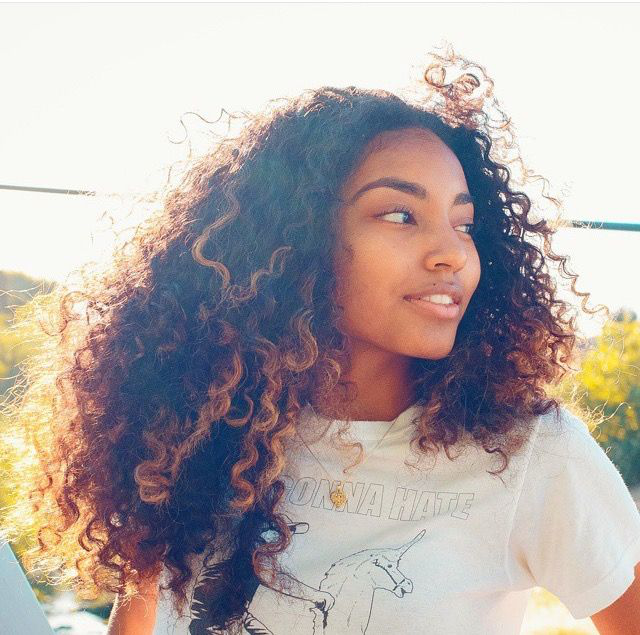

In [23]:
path = './data/train/curly'
name = '769e8e23280cdb066660bdbc85722169.jpg'
fullname = f'{path}/{name}'
load_img(fullname)

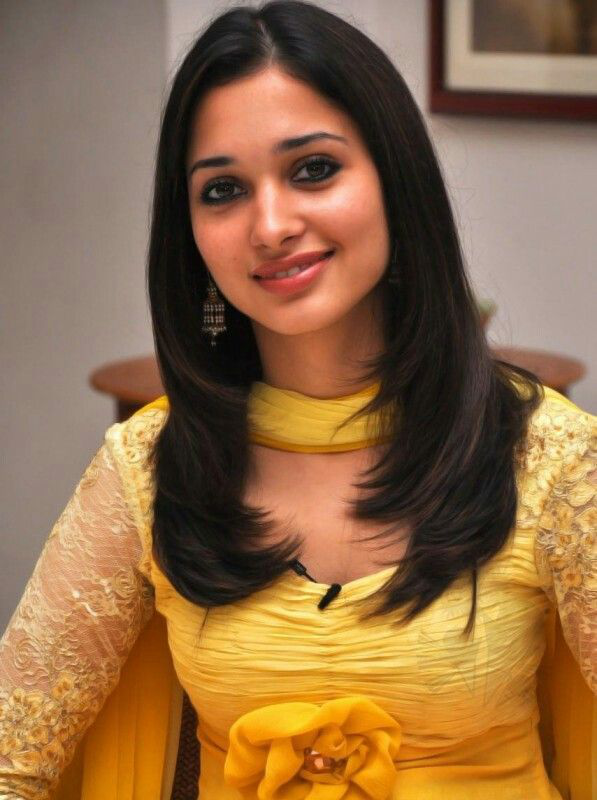

In [24]:
path = './data/train/straight'
name = '060c671d89cba47235d3a8a620bed080.jpg'
fullname = f'{path}/{name}'
load_img(fullname)

In [28]:
train_img_directory=os.path.join('data','train')
test_img_directory=os.path.join('data','test')

In [29]:
train_img_directory

'data/train'

In [30]:
train_class_subdirectories=os.listdir(train_img_directory)
test_class_subdirectories=os.listdir(test_img_directory)


In [31]:
train_class_subdirectories

['straight', 'curly']

In [32]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Input
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator

dataset/  
>     train/  
        curly/  
        straight/  
    validation/  
        curly/  
        straight/


In [54]:
# Create data generators for training and validation
train_gen = ImageDataGenerator(
    rescale=1.0 / 255.0,      # Normalize pixel values to [0, 1]
    rotation_range=50,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
    
)

val_gen = ImageDataGenerator(rescale=1.0 / 255.0)  # Only rescale for validation

# Define the paths
train_path = './data/train'
val_path = './data/test'

# Load datasets
train_ds = train_gen.flow_from_directory(
    train_path,
    target_size=(200, 200),   # Resize images to 200x200
    batch_size=20,           # Process images in batches of 20
    shuffle=True,           # shuffle 
    class_mode='binary'       # Binary classification (labels will be 0 or 1)
)

val_ds = val_gen.flow_from_directory(
    val_path,
    target_size=(200, 200),
    batch_size=20,
    shuffle=True,  
    class_mode='binary'
)


Found 800 images belonging to 2 classes.
Found 201 images belonging to 2 classes.


In [55]:
# Define the CNN model
model = Sequential([
    Input(shape=(200, 200, 3)),  # Define the input shape explicitly
    # Convolutional layer
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),  # Max pooling layer
    
    
    
    # Flatten the feature maps
    Flatten(),
    
    # Fully connected layer
    Dense(64, activation='relu'),
    
    # Output layer for binary classification
    Dense(1, activation='sigmoid')  # Single neuron with sigmoid activation
    
])




# Question 2  
* 896  
* 11214912  
* 15896912  
* 20072512  

In [57]:

# Compile the model
optimizer = SGD(learning_rate=0.002, momentum=0.8)
# Define loss function with from_logits=True
loss = BinaryCrossentropy(from_logits=False)

# Compile model
model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])


# Print the model summary
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 198, 198, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 99, 99, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 313632)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 64)             │    20,072,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 20,073,473 (76.57 MB)

 Trainable params: 20,073,473 (76.57 MB)

 Non-trainable params: 0 (0.00 B)

In [58]:
# Train the model
history = model.fit(
    train_ds,               # Training data generator
    epochs=10,              # Number of epochs
    validation_data=val_ds  # Validation data generator
)


Epoch 1/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 21s 497ms/step - accuracy: 0.5093 - loss: 0.7194 - val_accuracy: 0.6318 - val_loss: 0.6484
Epoch 2/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 20s 486ms/step - accuracy: 0.5709 - loss: 0.6703 - val_accuracy: 0.6269 - val_loss: 0.6392
Epoch 3/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 20s 482ms/step - accuracy: 0.5938 - loss: 0.6488 - val_accuracy: 0.6318 - val_loss: 0.6292
Epoch 4/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 20s 487ms/step - accuracy: 0.6436 - loss: 0.6340 - val_accuracy: 0.6816 - val_loss: 0.6145
Epoch 5/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 20s 483ms/step - accuracy: 0.6776 - loss: 0.6191 - val_accuracy: 0.6219 - val_loss: 0.6481
Epoch 6/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 20s 489ms/step - accuracy: 0.6566 - loss: 0.6394 - val_accuracy: 0.6368 - val_loss: 0.6140
Epoch 7/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 20s 484ms/step - accuracy: 0.6984 - loss: 0.5977 - val_accuracy: 0.6766 - val_loss: 0.6151
Epoch 8/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 20s 487ms/step - accuracy: 0.6577 - loss: 0.6232 - val_accu

In [50]:
loss, accuracy = model.evaluate(val_ds)
print(f"Validation Loss: {loss}")
print(f"Validation Accuracy: {accuracy}")


11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 153ms/step - accuracy: 0.6760 - loss: 0.6151
Validation Loss: 0.601996898651123
Validation Accuracy: 0.6965174078941345


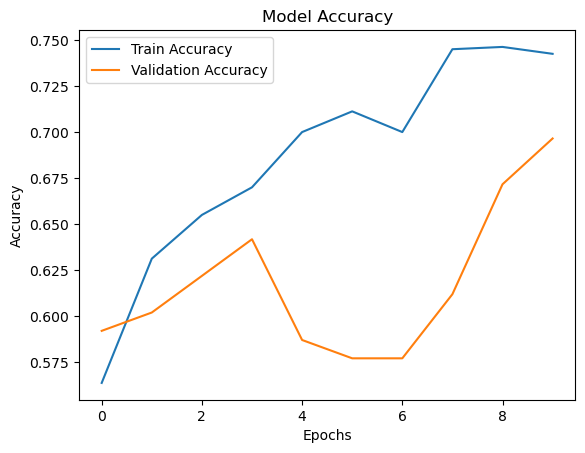

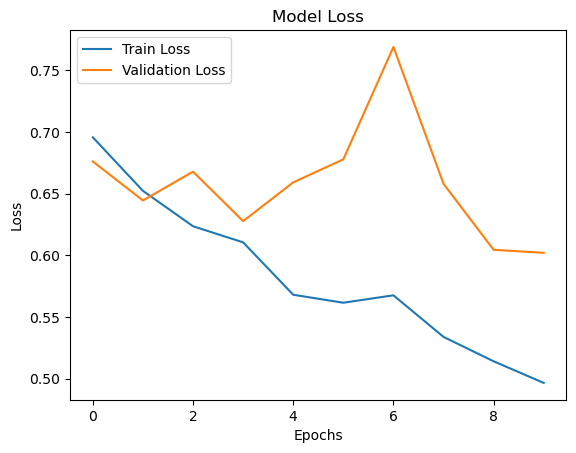

In [51]:


# Plot accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Model Accuracy')
plt.show()

# Plot loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Model Loss')
plt.show()


## Question 3. Median of training accuracy for all the epochs (1 point)
* 0.10
* 0.32
* 0.50
* 0.72

In [52]:
from numpy import median
median(history.history['accuracy'])

0.699999988079071

In [53]:
np.std(history.history['loss'])

0.0595858693214774

In [59]:
np.mean(history.history['val_loss'])


0.6211228191852569

In [60]:
np.sum(history.history['val_accuracy'][5:])/5

0.6507462620735168

## Question 4
#### What is the standard deviation of training loss for all the epochs for this model?
* 0.028
* 0.068
* 0.128
* 0.168

In [247]:
# Create data generators for training and validation
train_gen = ImageDataGenerator(
    rescale=1.0 / 255.0,      # Normalize pixel values to [0, 1]
    rotation_range=50,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)
# Define the paths
train_path = './data/train'
val_path = './data/test'

# Load datasets
train_ds = train_gen.flow_from_directory(
    train_path,
    target_size=(200, 200),   # Resize images to 200x200
    batch_size=20,           # Process images in batches of 20
    shuffle=True,           # shuffle 
    class_mode='binary'       # Binary classification (labels will be 0 or 1)
)

val_ds = val_gen.flow_from_directory(
    val_path,
    target_size=(200, 200),
    batch_size=20,
    shuffle=True,  
    class_mode='binary'
)

Found 804 images belonging to 2 classes.
Found 201 images belonging to 2 classes.


In [248]:
# Train the model
history = model.fit(
    train_ds,               # Training data generator
    epochs=10,              # Number of epochs
    validation_data=val_ds  # Validation data generator
)


Epoch 1/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 23s 560ms/step - accuracy: 0.6891 - loss: 0.5837 - val_accuracy: 0.6617 - val_loss: 0.6124
Epoch 2/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 23s 548ms/step - accuracy: 0.6412 - loss: 0.6219 - val_accuracy: 0.6617 - val_loss: 0.6235
Epoch 3/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 23s 548ms/step - accuracy: 0.6740 - loss: 0.5967 - val_accuracy: 0.6667 - val_loss: 0.6094
Epoch 4/10
21/41 ━━━━━━━━━━━━━━━━━━━━ 10s 507ms/step - accuracy: 0.6612 - loss: 0.6271

KeyboardInterrupt: 

In [ ]:
loss, accuracy = model.evaluate(val_ds)
print(f"Validation Loss: {loss}")
print(f"Validation Accuracy: {accuracy}")


In [ ]:
# Plot accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Model Accuracy')
plt.show()

# Plot loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Model Loss')
plt.show()

In [ ]:
np.mean(history.history['val_loss'])
np.sum(history.history['val_accuracy'][5:])/5


In [ ]:
np.mean(history.history['val_accuracy'])

0.6318407893180847